<a href="https://colab.research.google.com/github/Falanger-debug/Data-Visualization/blob/main/Beautiful_Soup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Beautiful Soup
Zebranie krakowskich ogłoszeń z serwisu otodom oraz ich wizualizacja.


In [ ]:
import json
import re
import pandas as pd
import urllib
from urllib.request import Request
from bs4 import BeautifulSoup

Pobieramy html z otodom.pl i wstępnie procesujemy przez Beauriful Soup


In [ ]:
import urllib.request
from bs4 import BeautifulSoup

url = "https://www.otodom.pl/pl/wyniki/sprzedaz/mieszkanie/malopolskie/krakow/krakow/krakow?limit=36&ownerTypeSingleSelect=ALL&priceMin=1&by=DEFAULT&direction=DESC&viewType=listing&page="

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/117.0.0.0 Safari/537.36'
}

pages = []
for page_number in range(1, 150):
    print(f'Pobieranie strony {page_number}')
    req = urllib.request.Request(f'{url}{page_number}', headers=headers)
    with urllib.request.urlopen(req) as resp:
        processed_page = BeautifulSoup(resp.read().decode('utf-8'), "html.parser")
        pages.append(processed_page)


Pobieranie strony 1
Pobieranie strony 2
Pobieranie strony 3
Pobieranie strony 4
Pobieranie strony 5
Pobieranie strony 6
Pobieranie strony 7
Pobieranie strony 8
Pobieranie strony 9
Pobieranie strony 10
Pobieranie strony 11
Pobieranie strony 12
Pobieranie strony 13
Pobieranie strony 14
Pobieranie strony 15
Pobieranie strony 16
Pobieranie strony 17
Pobieranie strony 18
Pobieranie strony 19
Pobieranie strony 20
Pobieranie strony 21
Pobieranie strony 22
Pobieranie strony 23
Pobieranie strony 24
Pobieranie strony 25
Pobieranie strony 26
Pobieranie strony 27
Pobieranie strony 28
Pobieranie strony 29
Pobieranie strony 30
Pobieranie strony 31
Pobieranie strony 32
Pobieranie strony 33
Pobieranie strony 34
Pobieranie strony 35
Pobieranie strony 36
Pobieranie strony 37
Pobieranie strony 38
Pobieranie strony 39
Pobieranie strony 40
Pobieranie strony 41
Pobieranie strony 42
Pobieranie strony 43
Pobieranie strony 44
Pobieranie strony 45
Pobieranie strony 46
Pobieranie strony 47
Pobieranie strony 48
P

In [ ]:
pages[2]

<!DOCTYPE html>
<html lang="pl"><head data-consent="ignore"><meta charset="utf-8"/><meta content="width=device-width" name="viewport"/><link href="https://statics.otodom.pl/static/otodompl/naspersclassifieds-regional/verticalsre-atlas-web-otodompl/static/img/favicon.svg" rel="icon"/><link href="https://statics.otodom.pl/static/otodompl/naspersclassifieds-regional/verticalsre-atlas-web-otodompl/static/img/app-icon.png" rel="apple-touch-icon"/><link href="https://statics.otodom.pl/static/otodompl/naspersclassifieds-regional/verticalsre-atlas-web-otodompl/static/img/app-icon.png" rel="android-touch-icon"/><meta content="1490856384482695" property="fb:app_id"/><meta content="https://statics.otodom.pl/static/otodompl/naspersclassifieds-regional/verticalsre-atlas-web-otodompl/static/img/fb/fb-image200x200.png?t=20-11-09" property="og:image"/><meta content="website" property="og:type"/><meta content="https://www.otodom.pl/" property="og:url"/><meta content="www.otodom.pl/" property="og:site_n

Teraz chcę zrobić ekstrakcję tego co mnie interesuje.

In [ ]:
interere = []
for page in pages:
  interere += page.find_all("article", attrs={"data-cy": "listing-item"})

In [ ]:
interere

[<article class="css-136g1q2 eg92do40" data-cy="listing-item"><style data-emotion="css yu2ro5">.css-yu2ro5{display:grid;grid-template-rows:246px auto;}@media (min-width: 992px){.css-yu2ro5{grid-template-columns:400px auto;grid-template-rows:unset;}}</style><style data-emotion="css 1xi9t0b">.css-1xi9t0b{position:relative;background-color:#FFFFFF;display:grid;grid-template-rows:246px auto;}@media (min-width: 992px){.css-1xi9t0b{grid-template-columns:400px auto;grid-template-rows:unset;}}</style><section class="eg92do41 css-1xi9t0b e12fn6ie0"><style data-emotion="css 17ztuls">.css-17ztuls{position:relative;z-index:1;}</style><div class="css-17ztuls e17g0c821"><style data-emotion="css gahv6t">.css-gahv6t{display:-webkit-box;display:-webkit-flex;display:-ms-flexbox;display:flex;position:relative;-webkit-flex-direction:column;-ms-flex-direction:column;flex-direction:column;height:100%;background-color:#F2F3F6;}</style><div class="css-gahv6t ebi70po0"><style data-emotion="css 1g43fk1">.css-1g

Teraz do dzieła, zacznę od analizy jednego ogłoszenia

In [ ]:
singleHouseHtml = interere[2]
singleHouse = {}

singleHouse['Tytuł'] = singleHouseHtml.find("p", attrs={"data-cy": "listing-item-title"}).get_text(strip=True)
singleHouse['Cena'] = int(singleHouseHtml.find("span", class_="css-2bt9f1 evk7nst0").get_text(strip=True).replace('\xa0','').replace('zł',''))

dtTags = singleHouseHtml.find_all("dt")
ddTags = singleHouseHtml.find_all("dd")

for dt, dd in zip(dtTags, ddTags):
    key = dt.get_text(strip=True)
    value = dd.get_text(strip=True).replace("\xa0", " ")
    value = re.sub(r"[^\d]", "", value)
    value = int(value) if value.isdigit() else value
    singleHouse[key] = value

print(singleHouse)

{'Tytuł': '3 pokoje, nowe budownictwo Do Wilgi', 'Cena': 774000, 'Liczba pokoi': 3, 'Powierzchnia': 4861, 'Cena za metr kwadratowy': 15923, 'Piętro': 2}


In [ ]:
numericValues = {key: value for key, value in singleHouse.items() if isinstance(value, (int, float))}
numericValues

{'Price': 774000,
 'Liczba pokoi': 3,
 'Powierzchnia': 4861,
 'Cena za metr kwadratowy': 15923,
 'Piętro': 2}

Teraz wykonajmy działania dla całego zbioru

In [ ]:
housesData = []

for singleHouseHtml in interere:
  singleHouse = {}

  try:
    title_tag = singleHouseHtml.find("p", attrs={"data-cy": "listing-item-title"})
    singleHouse['Tytuł'] = title_tag.get_text(strip=True) if title_tag else "Brak tytułu"

    price_tag = singleHouseHtml.find("span", class_=lambda x: x and "css-2bt9f1" in x)
    price_text = price_tag.get_text(strip=True).replace('\xa0', '').replace('zł', '')

    singleHouse['Cena'] = int(price_text)

    dtTags = singleHouseHtml.find_all("dt")
    ddTags = singleHouseHtml.find_all("dd")

    for dt, dd in zip(dtTags, ddTags):
      key = dt.get_text(strip=True)
      value = dd.get_text(strip=True).replace("\xa0", " ")
      value = re.sub(r"[^\d]", "", value)
      value = int(value) if value.isdigit() else value
      singleHouse[key] = value

    location_tag = singleHouseHtml.find("p", class_="css-42r2ms eejmx80")
    if location_tag:
        location_parts = [part.strip() for part in location_tag.get_text().split(",")]
        if len(location_parts) >= 3:
            singleHouse['Dzielnica'] = location_parts[-3]
        else:
            singleHouse['Dzielnica'] = "Nieznana"
    else:
        singleHouse['Dzielnica'] = "Nieznana"

    housesData.append(singleHouse)
  except (AttributeError, ValueError) as e:
    continue

print(f"Rozmiar dataSetu: {len(housesData)}")
print(f"Przykładowa oferta: {housesData[2]}")


Rozmiar dataSetu: 4473
Przykładowa oferta: {'Tytuł': 'Na sprzedaż 3-pokoje ul. Dobrego Pasterza', 'Cena': 719000, 'Liczba pokoi': 3, 'Powierzchnia': 525, 'Cena za metr kwadratowy': 13695, 'Piętro': 3, 'Dzielnica': 'Mistrzejowice'}


Teraz przejdę do clue tego zadania - czyli wizualizacji ciekawych w mojej opinii parametrów.

1. Średnia cena za m^2 w poszczególnych dzielnicach

<ipython-input-71-1ba997313723>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="Dzielnica", y="Cena za metr kwadratowy", estimator='mean', ci=None)


Text(0, 0.5, 'Cena za m² (zł)')

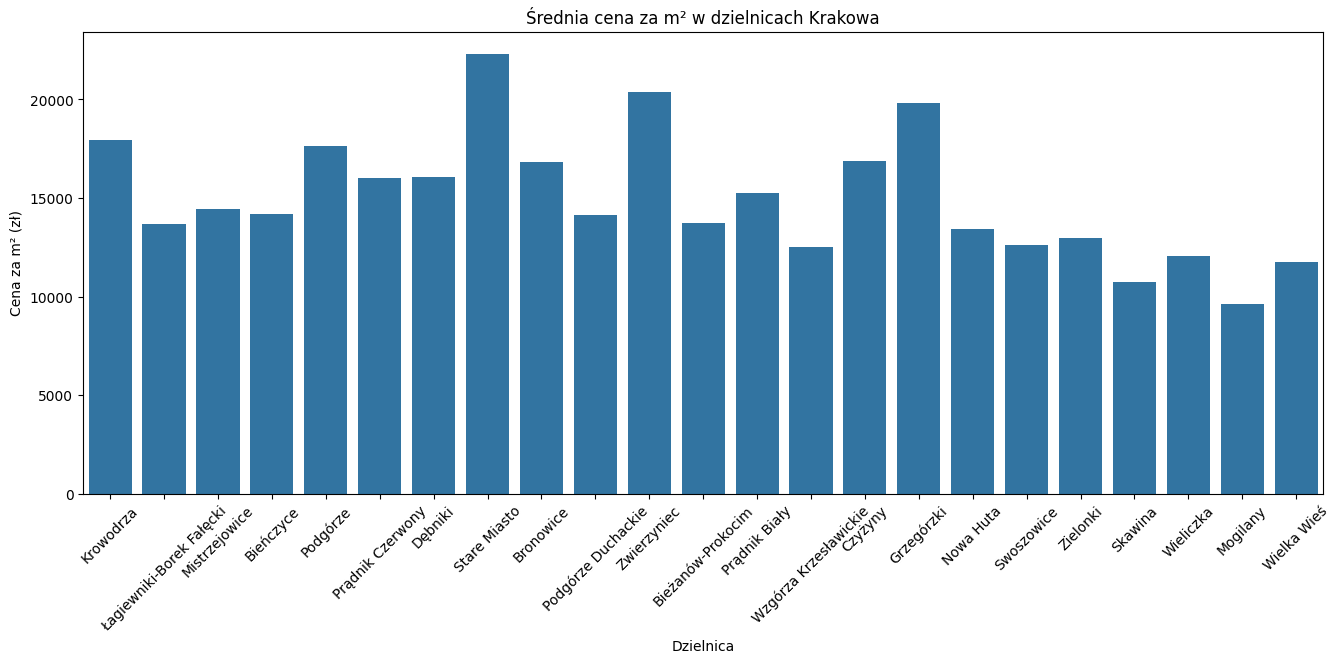

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame(housesData)

plt.figure(figsize=(16,6))
sns.barplot(data=df, x="Dzielnica", y="Cena za metr kwadratowy", estimator='mean', ci=None)
plt.xticks(rotation=45)
plt.title("Średnia cena za m² w dzielnicach Krakowa")
plt.ylabel("Cena za m² (zł)")


2. Jaki jest przedział cen mieszkań dla naszego zbioru?

In [ ]:
min = df['Cena'].min()
max = df['Cena'].max()
print(f"Przedział cen od {min}zł do {max}zł")

Przedział cen od 49999zł do 13500000zł


3. Rozskład cen mieszkań (histogram bez outliers)

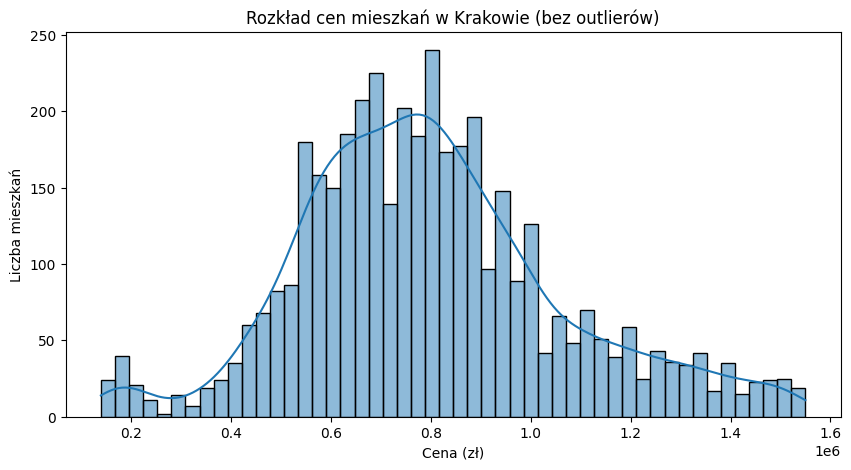

In [ ]:
import numpy as np

# Oblicz IQR
Q1 = df['Cena'].quantile(0.25)
Q3 = df['Cena'].quantile(0.75)
IQR = Q3 - Q1

# Filtruj outliery
filtered_df = df[(df['Cena'] >= Q1 - 1.5 * IQR) & (df['Cena'] <= Q3 + 1.5 * IQR)]

# Histogram bez outlierów
plt.figure(figsize=(10,5))
sns.histplot(filtered_df['Cena'], bins=50, kde=True)
plt.title("Rozkład cen mieszkań w Krakowie (bez outlierów)")
plt.xlabel("Cena (zł)")
plt.ylabel("Liczba mieszkań")
plt.show()



3. Zależność ceny z m^2 od powierzchni.

<ipython-input-78-5d7c970c15e0>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df_cleaned, x="Powierzchnia", y="Cena za metr kwadratowy", alpha=0.6, palette="tab10")
<ipython-input-78-5d7c970c15e0>:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


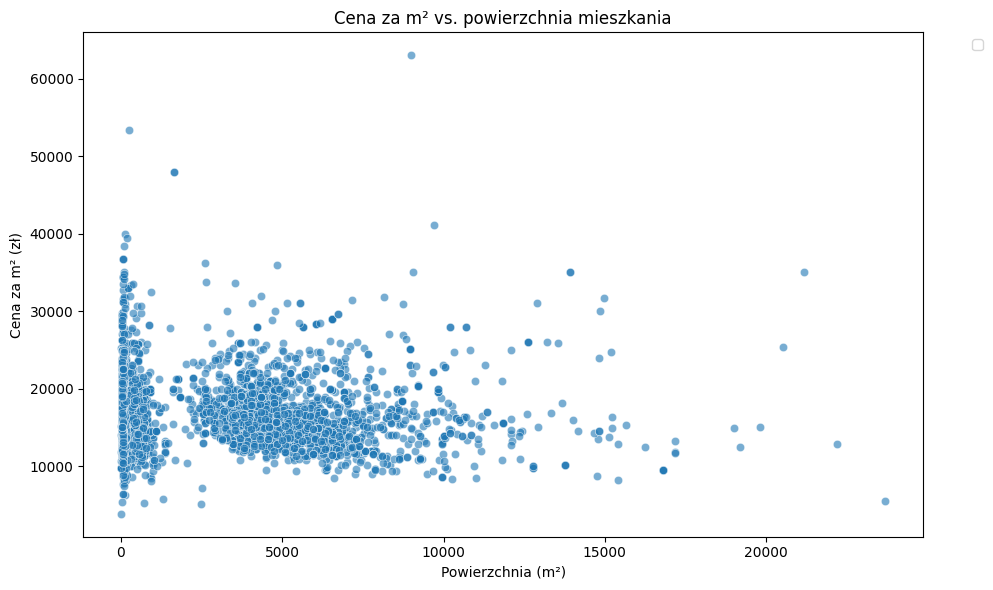

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="Powierzchnia", y="Cena za metr kwadratowy", alpha=0.6, palette="tab10")
plt.title("Cena za m² vs. powierzchnia mieszkania")
plt.xlabel("Powierzchnia (m²)")
plt.ylabel("Cena za m² (zł)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


4. Liczba pokoi w ofertach

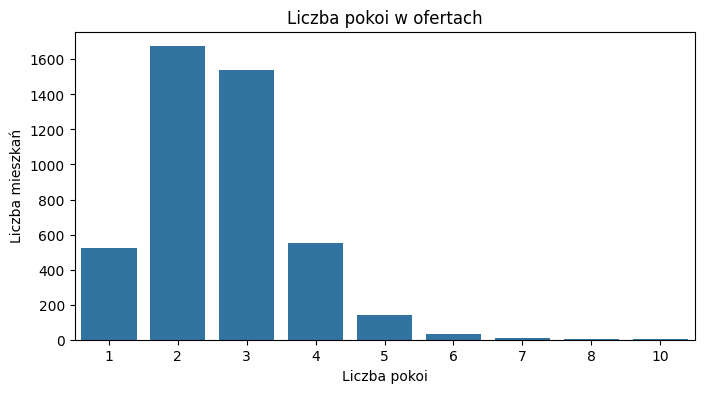

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, x="Liczba pokoi")
plt.title("Liczba pokoi w ofertach")
plt.xlabel("Liczba pokoi")
plt.ylabel("Liczba mieszkań")
plt.show()


5. Cena a piętro

<ipython-input-80-171d74d46e0b>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="Piętro", y="Cena", estimator='mean', ci=None)


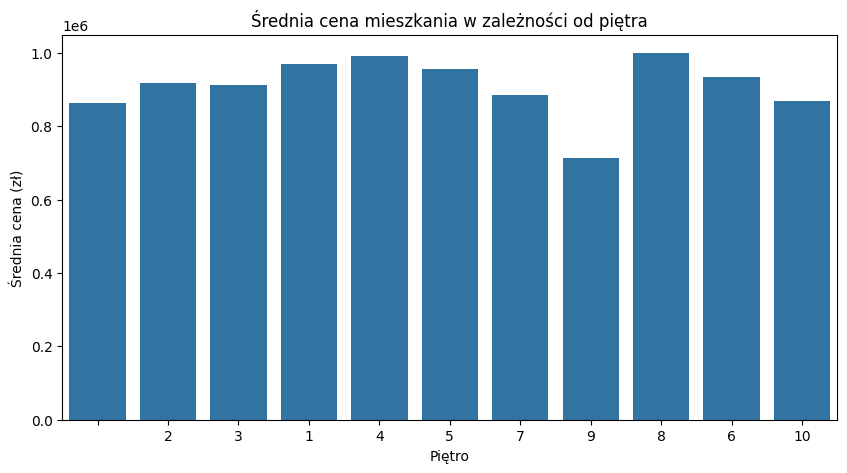

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x="Piętro", y="Cena", estimator='mean', ci=None)
plt.title("Średnia cena mieszkania w zależności od piętra")
plt.xlabel("Piętro")
plt.ylabel("Średnia cena (zł)")
plt.show()


6. Korelacje między cechami

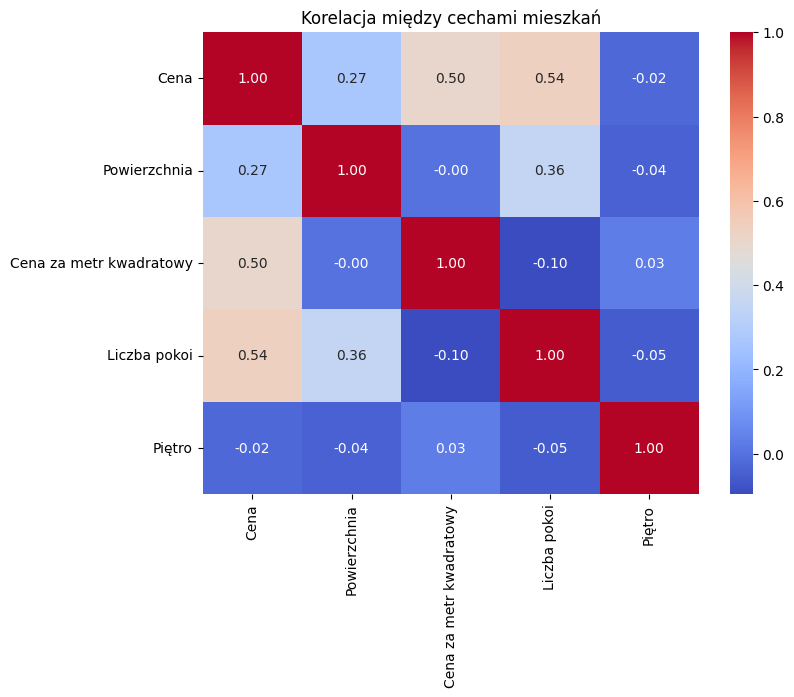

In [ ]:
cols = ["Cena", "Powierzchnia", "Cena za metr kwadratowy", "Liczba pokoi", "Piętro"]

for col in cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')


plt.figure(figsize=(8,6))
numeric = df[["Cena", "Powierzchnia", "Cena za metr kwadratowy", "Liczba pokoi", "Piętro"]]
sns.heatmap(numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelacja między cechami mieszkań")
plt.show()


5. Najpopularniejszych dzielnic w ogłoszeniach i porównanie ich ceny za metr kwadratowy

<ipython-input-84-6d68a963d319>:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_top, x="Dzielnica", y="Cena za metr kwadratowy", estimator="mean", ci=None, palette="Set2")
<ipython-input-84-6d68a963d319>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_top, x="Dzielnica", y="Cena za metr kwadratowy", estimator="mean", ci=None, palette="Set2")


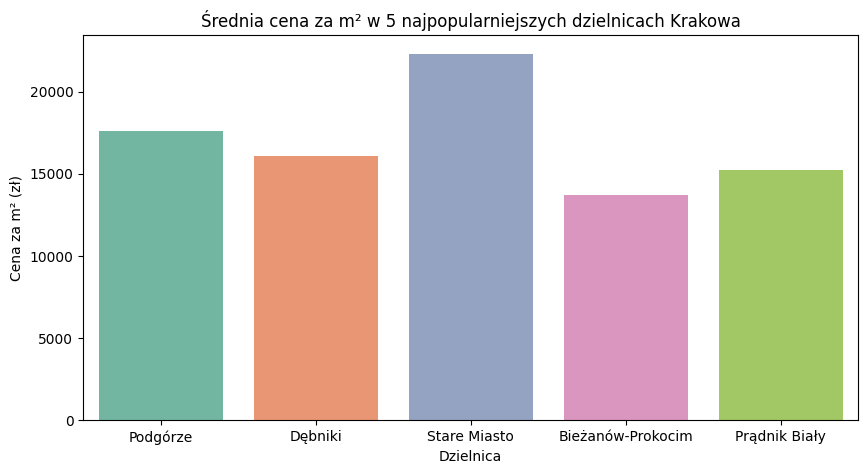

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df["Cena za metr kwadratowy"] = pd.to_numeric(df["Cena za metr kwadratowy"], errors="coerce")

top_dzielnice = df["Dzielnica"].value_counts().nlargest(5).index.tolist()

df_top = df[df["Dzielnica"].isin(top_dzielnice)]

plt.figure(figsize=(10,5))
sns.barplot(data=df_top, x="Dzielnica", y="Cena za metr kwadratowy", estimator="mean", ci=None, palette="Set2")
plt.title("Średnia cena za m² w 5 najpopularniejszych dzielnicach Krakowa")
plt.ylabel("Cena za m² (zł)")
plt.xlabel("Dzielnica")
plt.show()
